# Corruption analysis
Today is possible for us to readily and constantly check information online, over the years more and more people got access to mobile devices and this medium became the main for information exchange and gathering. We can imagine how this can influency society, but we're not going to study how people are interacting or being influenced, we're going to analyze the relations between CPI score of the country, the Number of Internet Users, and the Number of Journalists Killed.

We want to discover how the number of people with internet access can relate with the country CPI, because people would have more access on information, and also considering how many journalists have been killed in the country in those years. It's a hypotesis that the countries perceived to be more corrupt would have more journalists killed, due to actual corruption.

## About the data

We used three datasets*:
- Corruption Perception Index (CPI)
- Number Of Internet Users (# people with internet access)
- Number Of Journalists Killed

**All the datasets were downloaded from [Gap Minder](https://www.gapminder.org)*

We're considering the years from **2012** to **2016** and only countries that had journalists killed during that period.

### Corruption Perception Index (CPI)
[Transparency International, CPI 2018](https://www.transparency.org/cpi2018)

More about the index (YouTube Video):

[![CPI 2018](https://i.ytimg.com/vi/OXApeTYRYNQ/hqdefault.jpg?sqp=-oaymwEZCPYBEIoBSFXyq4qpAwsIARUAAIhCGAFwAQ==&rs=AOn4CLCNIW09Vs8woiyo5Y824JeMQarslQ)](https://www.youtube.com/watch?v=OXApeTYRYNQ)

## Importing modules and data

First we need to import the modules that we're going to use for wrangling the data. Also import the three datasets that's going to be cleaned before the analysis.

In [83]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df_internet = pd.read_csv('data/internet_users.csv')
df_killings = pd.read_csv('data/num_of_journalists_killed.csv')
df_cpi = pd.read_csv('data/corruption_perception_index_cpi.csv')

In [84]:
# Let's create a list with the datasets for easier iteration
dfs = [df_internet, df_killings, df_cpi]

## Assessing the data

Let's analyze the dataframes to see if we have any data missing or need to adequate any data type.

In [85]:
# Internet users
dfs[0].head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,0.01120,0.03220,0.04860,0.0650,...,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,NaN
2,Algeria,NaN,NaN,NaN,NaN,0.00036,0.00177,0.00174,0.01030,0.0202,...,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,1.53000,3.05000,6.8900,...,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,0.00078,0.00567,0.0185,...,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0,NaN


In [86]:
# Internet users
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
country    193 non-null object
1990       19 non-null float64
1991       30 non-null float64
1992       42 non-null float64
1993       54 non-null float64
1994       74 non-null float64
1995       118 non-null float64
1996       155 non-null float64
1997       168 non-null float64
1998       175 non-null float64
1999       181 non-null float64
2000       183 non-null float64
2001       185 non-null float64
2002       185 non-null float64
2003       180 non-null float64
2004       183 non-null float64
2005       184 non-null float64
2006       183 non-null float64
2007       190 non-null float64
2008       189 non-null float64
2009       188 non-null float64
2010       188 non-null float64
2011       191 non-null float64
2012       188 non-null float64
2013       190 non-null float64
2014       190 non-null float64
2015       190 non-null float64
2016       190 non-null float64
2017 

In [87]:
# Journalists Killed
dfs[1].head()

,country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,2.0,2.0,NaN,NaN,3.0,NaN,4.0,4.0,13.0
1,Algeria,1.0,8.0,18.0,24.0,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,1.0,3.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Azerbaijan,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Journalists Killed
dfs[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
country    100 non-null object
1992       16 non-null float64
1993       19 non-null float64
1994       20 non-null float64
1995       16 non-null float64
1996       14 non-null float64
1997       13 non-null float64
1998       17 non-null float64
1999       10 non-null float64
2000       16 non-null float64
2001       20 non-null float64
2002       10 non-null float64
2003       16 non-null float64
2004       19 non-null float64
2005       18 non-null float64
2006       16 non-null float64
2007       20 non-null float64
2008       14 non-null float64
2009       22 non-null float64
2010       21 non-null float64
2011       23 non-null float64
2012       20 non-null float64
2013       13 non-null float64
2014       20 non-null float64
2015       21 non-null float64
2016       15 non-null float64
2017       17 non-null float64
2018       15 non-null float64
dtypes: float64(27), object(

In [89]:
# CPI
dfs[2].head()

,country,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.0,8.0,12.0,11.0,15.0,15
1,Albania,33.0,31.0,33.0,36.0,39.0,38
2,Algeria,34.0,36.0,36.0,36.0,34.0,33
3,Angola,22.0,23.0,19.0,15.0,18.0,19
4,Argentina,35.0,34.0,34.0,32.0,36.0,39


In [90]:
# CPI
dfs[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
country    177 non-null object
2012       172 non-null float64
2013       173 non-null float64
2014       171 non-null float64
2015       165 non-null float64
2016       173 non-null float64
2017       177 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


### Assessing - Fill NaN and correct type

We can observe in the log above that we have some missing numbers and one column with `int` data type. Let's fix that with the code below.

In [91]:
# Fill NaN with 0 considering that we only have float or int values that are null
# And fix data type, but skipping the first column
for d in dfs:
    d.fillna(0, inplace=True)
    d = d[d.columns[1:]].astype(float)

## Cleaning the datasets

After assessing our data, let's drop some columns in our dataframes for mantain only the columns that match between those dataframes. We're going to remove the year of 2017 also, because some incomplete data.

In [92]:
# Drop columns in Internet_users dataframe
dfs[0].drop(dfs[0].columns.to_series()['1990':'2011'], axis=1, inplace=True)
dfs[0].drop('2017', axis=1, inplace=True)

# Drop columns in Journalists_killed dataframe
dfs[1].drop(dfs[1].columns.to_series()['1992':'2011'], axis=1, inplace=True)
dfs[1].drop(['2017', '2018'], axis=1, inplace=True)

# Drop columns in CPI dataframe
dfs[2].drop('2017', axis=1, inplace=True)

## Combining the data and create a unique dataset

Now that our data is with the same number of columns and the missing data are filled we're going to combine the datasets following the [Tidy Data principles](https://cfss.uchicago.edu/notes/tidy-data/).

![Tidy Data dataset](https://r4ds.had.co.nz/images/tidy-1.png)

In [93]:
# Let's create a copy of our dataframes' lists
temp = dfs.copy()
temp[0].head()

,country,2012,2013,2014,2015,2016
0,Afghanistan,5.45,5.9,7.0,8.26,10.6
1,Albania,54.70,57.2,60.1,63.30,66.4
2,Algeria,18.20,22.5,29.5,38.20,42.9
3,Andorra,86.40,94.0,95.9,96.90,97.9
4,Angola,6.50,8.9,10.2,12.40,13.0


### Pivoting tables

We're going to pivot the year columns and create one unique column called `name` and one column for the `value`, this keep our data organized as described in the image above, with the columns as variables and our observations as rows.

In [94]:
# Change year columns to rows
for i in range(0,len(temp)):
    temp[i]=temp[i].melt(id_vars='country', value_vars=temp[i].columns[1:7])
    temp[i].rename(columns={'variable': 'year'}, inplace=True)

In [95]:
# After pivoting our column for the value needs to be renamed before merging the datasets
temp[0].rename(columns={'value': 'internet_users'}, inplace=True)
temp[1].rename(columns={'value': 'journalists_killed'}, inplace=True)
temp[2].rename(columns={'value': 'cpi'}, inplace=True)

In [96]:
# Before merging our data, we need to exclude the rows for that countries that none journalist was killed
group_killed = temp[1].groupby('country').sum()
none_killed = group_killed[group_killed['journalists_killed'] == 0].index

temp[1] = temp[1].set_index('country').drop(list(none_killed), axis=0)

In [97]:
# Now we simply merge the datasets in the indexes country and year
t1 = temp[0].merge(temp[1], on=['country', 'year'], how='inner')
t2 = t1.merge(temp[2], on=['country', 'year'], how='inner')

In [98]:
# For complete our transformations we use pivot_table to define our new indexes
ind = list(t2.columns[0:2])
col = list(t2.columns[2:])

t3 = t2.pivot_table(index=ind, values=col)
t3.reset_index(inplace=True) # we are reseting the index for making easier to apply queries
t3.head()

,country,year,cpi,internet_users,journalists_killed
0,Afghanistan,2012,8.0,5.45,0.0
1,Afghanistan,2013,8.0,5.90,0.0
2,Afghanistan,2014,12.0,7.00,3.0
3,Afghanistan,2015,11.0,8.26,0.0
4,Afghanistan,2016,15.0,10.60,4.0


## Create new dataset

Now that we finished the transformations needed we can create a new dataset for explorations and analysis.

In [99]:
df = t3.copy()

## Corruption Analysis - Exploring and answering questions
Now that we have our new dataset we can make our explorations and answer some questions about this dataset.

In [100]:
df.head()

,country,year,cpi,internet_users,journalists_killed
0,Afghanistan,2012,8.0,5.45,0.0
1,Afghanistan,2013,8.0,5.90,0.0
2,Afghanistan,2014,12.0,7.00,3.0
3,Afghanistan,2015,11.0,8.26,0.0
4,Afghanistan,2016,15.0,10.60,4.0


In [101]:
df.shape

(200, 5)

In [102]:
df.groupby('country').mean()

,cpi,internet_users,journalists_killed
country,,,
Afghanistan,10.8,7.442,1.4
Bahrain,48.4,92.000,0.2
Bangladesh,25.8,11.626,1.6
Brazil,41.2,54.680,3.6
Cambodia,21.0,16.088,0.2
Central African Republic,23.8,3.560,0.2
Colombia,36.6,53.460,0.8
"Congo, Dem. Rep.",21.6,3.378,0.4
Ecuador,32.6,44.800,0.2


In [103]:
df.groupby('year').mean()

,cpi,internet_users,journalists_killed
year,,,
2012,31.600,26.01900,1.800
2013,31.075,29.20900,1.825
2014,31.900,32.48375,1.425
2015,31.675,35.56550,1.825
2016,31.400,38.58925,1.250


In [123]:
# Variables of countries with CPI above and bellow the median score
low_cpi = df[df.cpi <= df.cpi.mean()]
high_cpi = df[df.cpi > df.cpi.mean()]

In [141]:
temp = df.groupby('country')['cpi'].mean()


### Define style properties

For consistency in styles and facillitating any change that has to affect all the graphs, we define somes new variables with stype properties.

In [104]:
# text styles
header = 24
title = 20
label = 14

# config styles
figsize = (15,12)
figsize_small = (7,7)
pad = 10

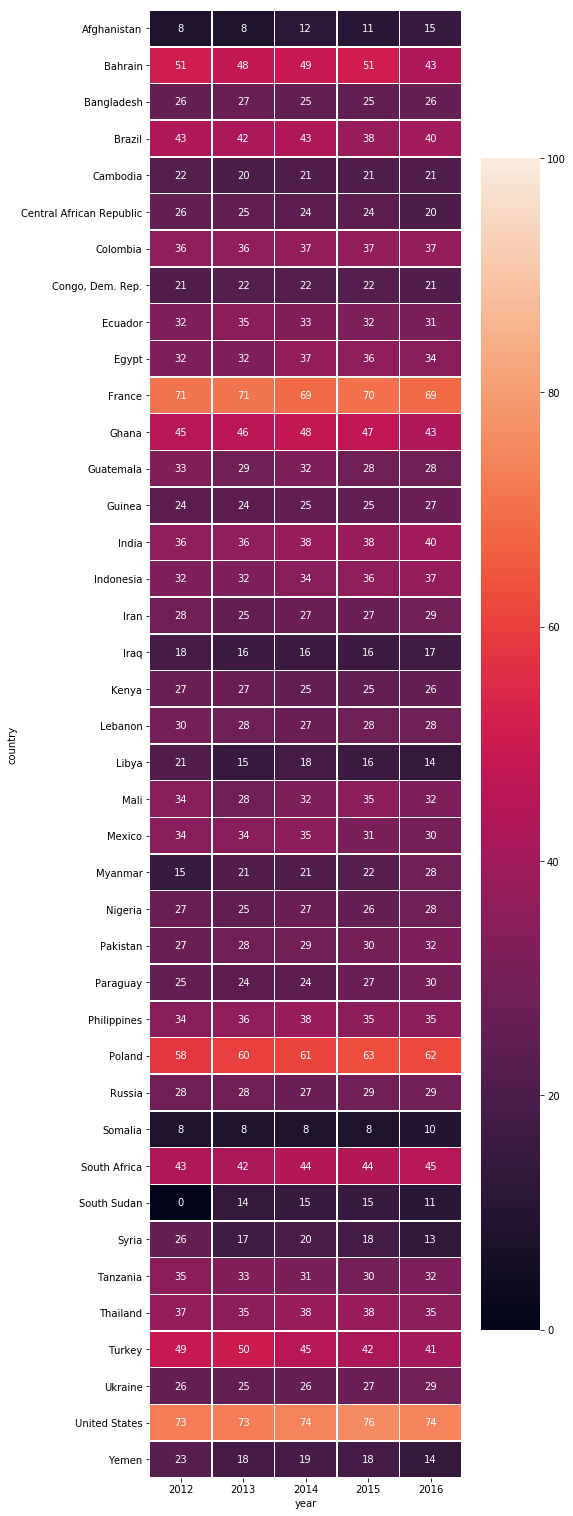

In [105]:
hm = df[['country', 'year', 'cpi']].copy()

fig, ax = plt.subplots(figsize=(7,27))

hm = hm.pivot('country', 'year', 'cpi')
ax = sns.heatmap(hm, vmin=0, vmax=100, annot=True, linewidths=.5)